# PCA-EDA
To perform brain alignment, we first reduce the dimension of the hidden states using PCA. Herein, we determine the optimal dimension for each layer across the set of the models that we wish to probe.

In [23]:
import pickle
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

In [93]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [91]:
sns.set_theme()
sns.set_style("whitegrid", {"grid.edgecolor": "black", "axes.edgecolor": "black", "xtick.bottom": True, "ytick.left": True})

In [141]:
m = pickle.load(open("../gemma2-9b-hs.pkl", "rb"))

In [142]:
threshold = 0.9

In [143]:
lpca = []
for l in tqdm.tqdm(m):
    pca.fit(l)
    lpca.append(np.cumsum(pca.explained_variance_ratio_))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:26<00:00,  1.58it/s]


In [144]:
# get the threshold points
breakls = []
for l in lpca:
    for idx, ev in enumerate(l):
        if ev > threshold:
            breakls.append((idx, ev))
            break

In [145]:
n = int(len(lpca) ** 0.5)
m = len(lpca) // n

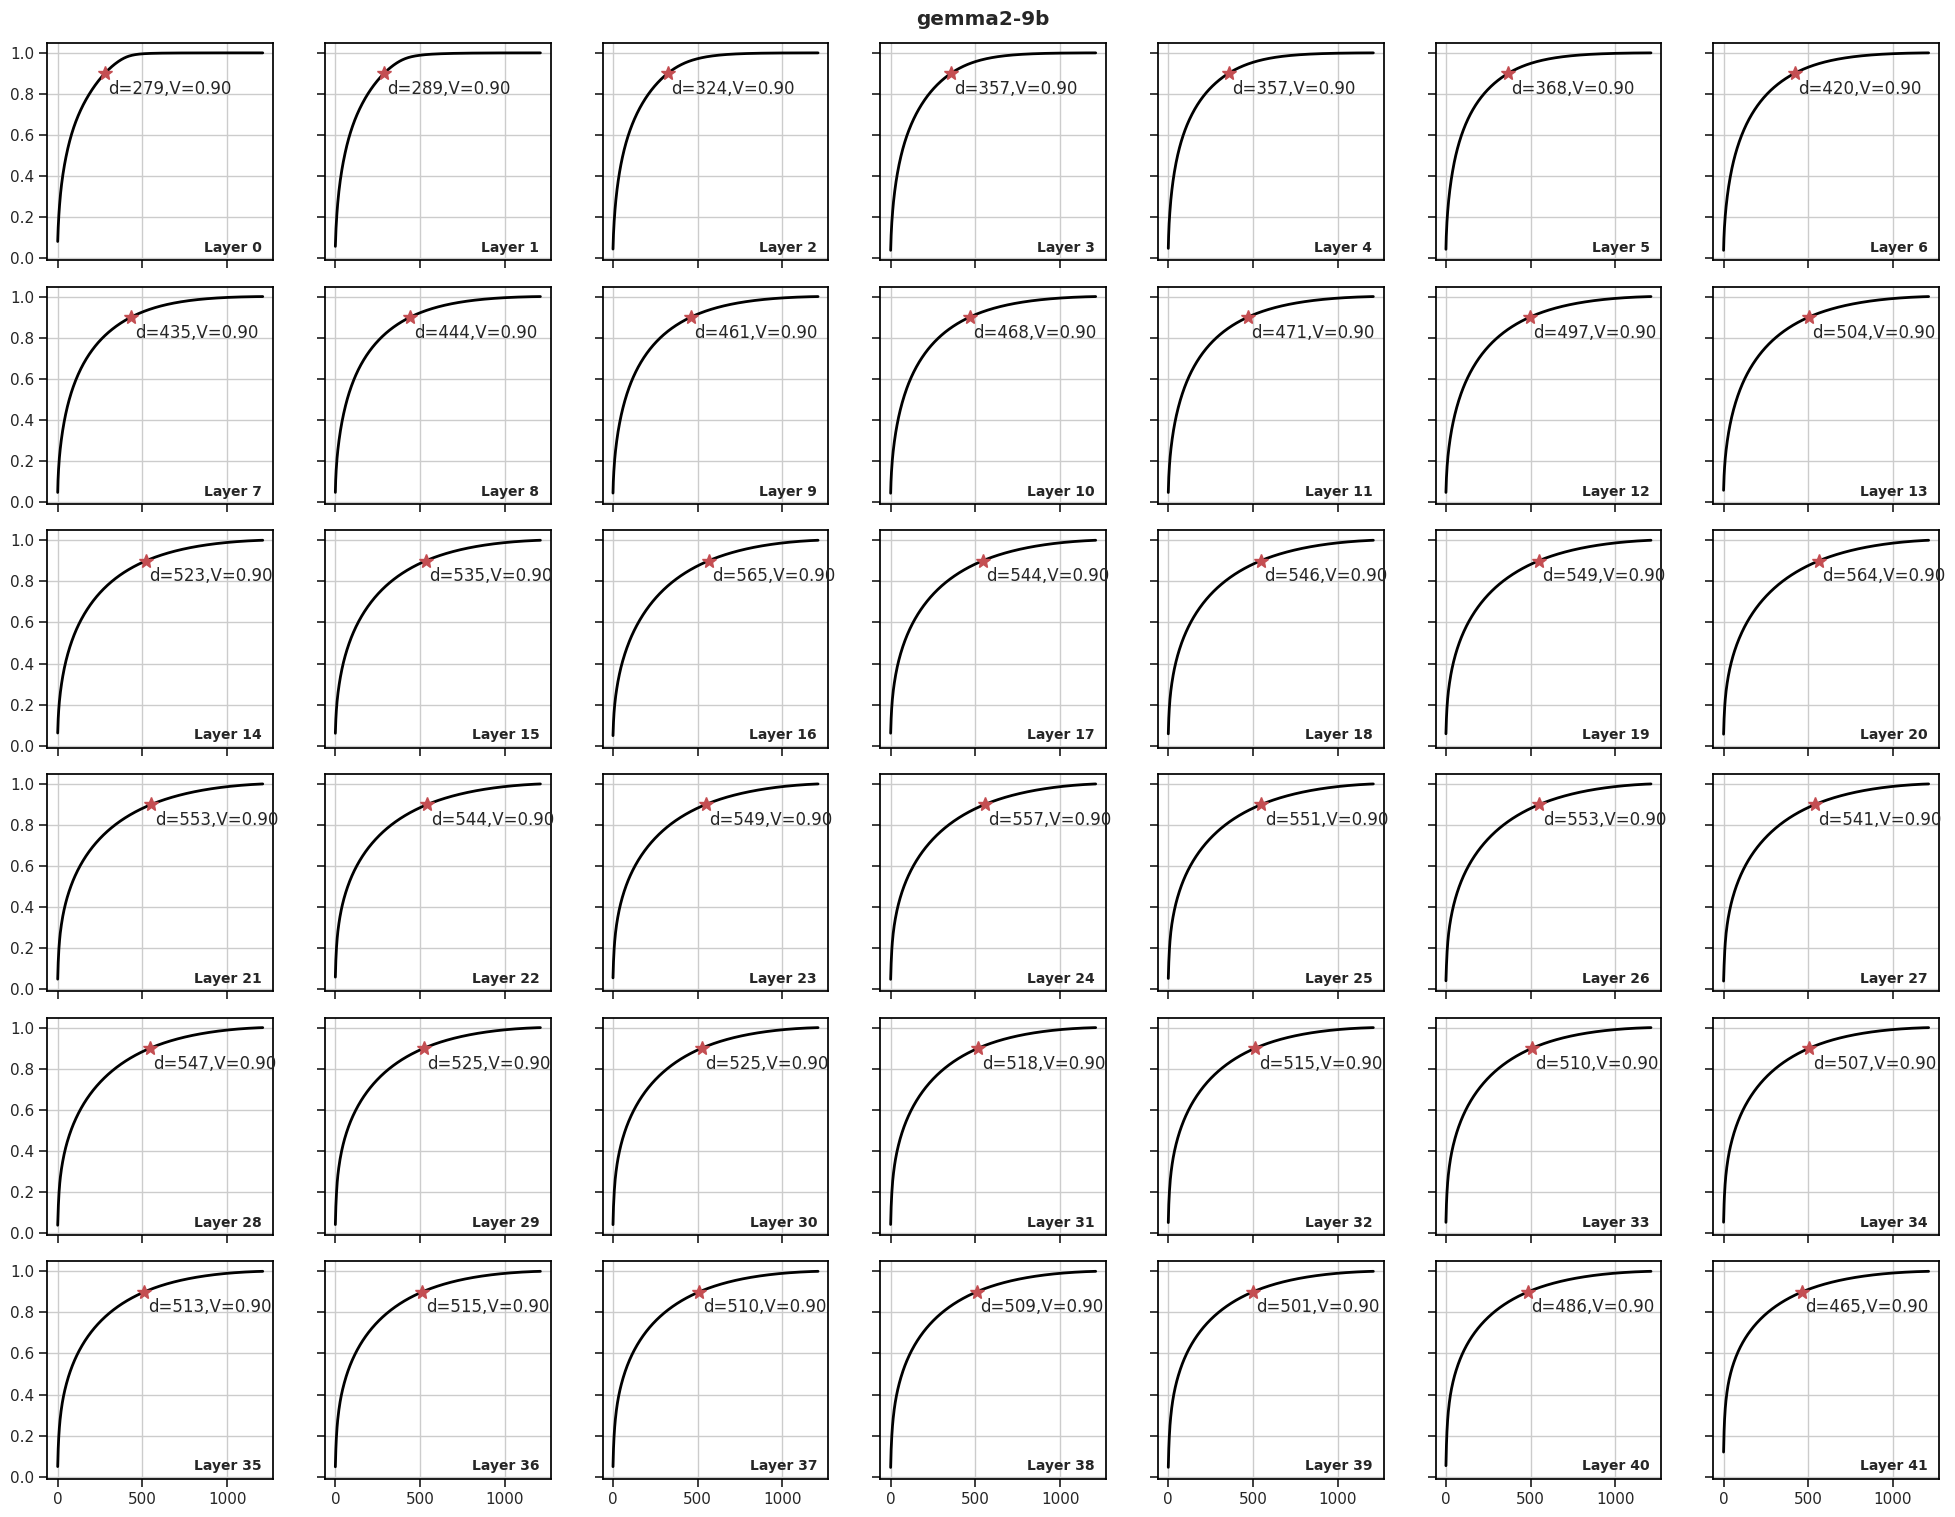

In [147]:
fig, axes = plt.subplots(n,m, figsize=(20,15), sharey=True, sharex=True)
for i, ax in enumerate(axes.flatten()):
    sns.lineplot(lpca[i], ax=ax, linewidth=2, color="black")
    ax.set_title(f"Layer {i}", y=0, x=.95, loc="right", fontsize=10, weight="bold")
    ax.plot(breakls[i][0], breakls[i][1], "*", markersize=10, color="r")
    ax.text(breakls[i][0]+20, breakls[i][1]-0.1, f"d={breakls[i][0]+1},V={breakls[i][1]:.2f}")
fig.tight_layout()
fig.suptitle("gemma2-9b", y=1.01, weight="bold")
plt.savefig("gemma2-9b-dims.pdf")